In [37]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

from gumbel_fc import *
from vae_cat import *

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
slim=tf.contrib.slim
Bernoulli = tf.contrib.distributions.Bernoulli

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
#from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [104]:
tf.reset_default_graph()

In [105]:
sess = tf.InteractiveSession()
enc = Encoder()
dec = Decoder()
model = Variational_Autoencoder(sess, enc, dec, checkpoint_name = 'vae_cat_checkpoint',
                               dataset=mnist.train, num_epochs=15)

In [110]:
model.train()

Epoch 1 loss: 101.844757316
Epoch 2 loss: 101.798328982
Epoch 3 loss: 101.720110654
Epoch 4 loss: 101.663604029
Epoch 5 loss: 101.659411441
Epoch 6 loss: 101.566277507
Epoch 7 loss: 101.624420776
Epoch 8 loss: 101.524195834
Epoch 9 loss: 101.558682806
Epoch 10 loss: 101.509694741
Epoch 11 loss: 101.554340071
Epoch 12 loss: 101.501234159
Epoch 13 loss: 101.557064819
Epoch 14 loss: 101.516959742
Epoch 15 loss: 101.451890106


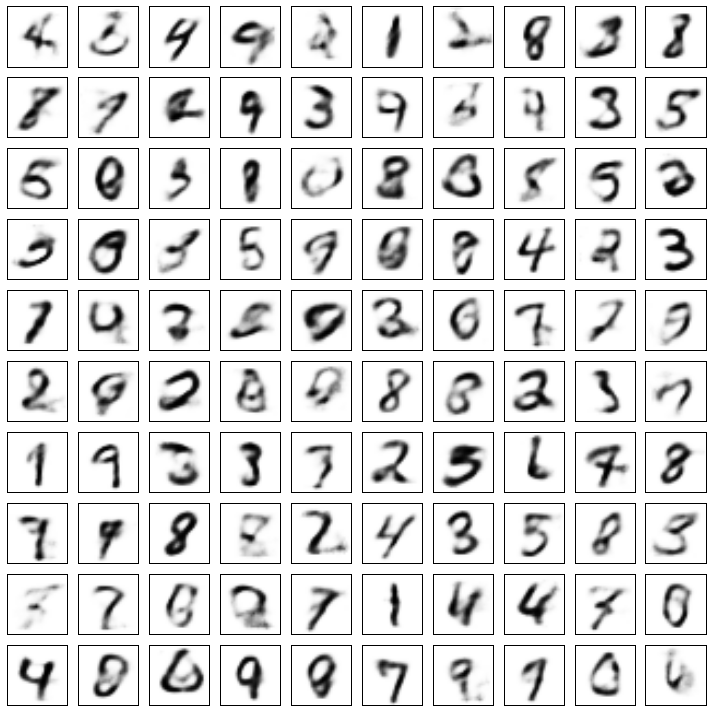

In [112]:
gen = model.generate()

plt.figure(figsize=(10,10))
for i in xrange(10):
    for j in xrange(10):
        plt.subplot(10, 10, 10*i+j+1)
        plt.imshow(gen[10*i+j].reshape(28,28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.savefig('images/vae_cat')
plt.show()
